In [1]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loading Excel File into the memory

In [3]:
data= pd.read_excel('uber-raw-data-sep14.xlsx')

In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-01-09 00:01:00,40.2201,-74.0021,B02512
1,2014-01-09 00:01:00,40.7500,-74.0027,B02512
2,2014-01-09 00:03:00,40.7559,-73.9864,B02512
3,2014-01-09 00:06:00,40.7450,-73.9889,B02512
4,2014-01-09 00:11:00,40.8145,-73.9444,B02512


In [5]:
#Converting Date time column from text to date and time format

In [6]:
data['Date/Time']=data['Date/Time'].map(pd.to_datetime)

In [7]:
data.tail()

,Date/Time,Lat,Lon,Base
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764


In [8]:
def DayOfMonth(date):
    return date.day

data['DayOfMonth']=data['Date/Time'].map(DayOfMonth)

In [9]:
data.tail()

,Date/Time,Lat,Lon,Base,DayOfMonth
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30


In [10]:
def get_weekday(date):
    return date.weekday()

data['Weekday']=data['Date/Time'].map(get_weekday)

def get_hour(date):
    return date.hour

data['Hour']=data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,DayOfMonth,Weekday,Hour
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,1,22


In [11]:
#analysis

In [12]:
#Histrogram to check how many ubers were booked on which day

Text(0.5, 1.0, 'Frequency by Day of Month - uber- Sep 2014')

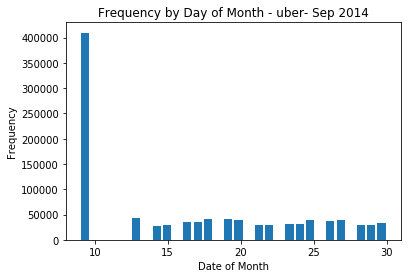

In [13]:
hist(data.DayOfMonth,bins=30,rwidth=.8)
xlabel("Date of Month")
ylabel("Frequency")
title("Frequency by Day of Month - uber- Sep 2014")

In [14]:
#for day, total in data.groupby('DayOfMonth'):
#    print((day, len(total)))


def count(row):
    return len(row)

by_date=data.groupby("DayOfMonth").apply(count)
by_date

DayOfMonth
9     409565
13     43205
14     28122
15     29454
16     36092
17     35531
18     40274
19     41017
20     38864
21     28620
22     28312
23     30316
24     31301
25     38203
26     37504
27     39468
28     29656
29     29201
30     33431
dtype: int64

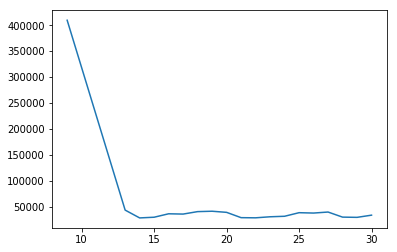

In [15]:
plot(by_date)

In [16]:
# analyse hours

(array([16107., 10702., 10789., 12675., 20262., 33307., 43314., 44477.,
        38542., 37634., 38821., 39193., 45042., 52643., 61219., 68224.,
        73373., 75040., 69660., 63988., 60606., 51817., 36568.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

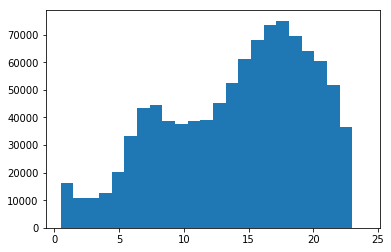

In [17]:
hist(data.Hour,bins=24,range=(0.5,24))

#analyze weekday

([<matplotlib.axis.XTick at 0x217ee8db1d0>,
 <a list of 7 Text xticklabel objects>)

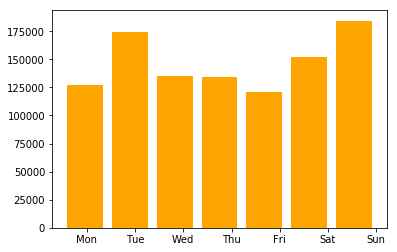

In [18]:
hist(data.Weekday,bins=7,range=(-0.5,6),rwidth=0.8,color='orange')
xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())

In [19]:
#Cross Analysis of hours and week day

In [20]:
by_h_d=data.groupby('Weekday Hour'.split()).apply(count).unstack()
by_h_d

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,2569,1632,1163,1554,2051,3052,4642,5833,5955,4924,...,6447,7520,8527,9022,8996,8245,7736,7150,6229,4487
1,1802,1063,787,1258,2053,4158,7409,9537,9392,7220,...,8690,10284,11390,12915,13139,12216,11154,10217,8194,4675
2,3098,1927,1304,1337,1578,2696,4718,6021,5825,5007,...,7112,8412,9286,9823,10031,9028,8717,7874,6203,3636
3,1918,1275,892,1133,1548,2743,4859,6588,6465,5666,...,6678,7904,9049,9840,9830,9244,8519,8049,6455,3929
4,1913,1140,740,1017,1341,2295,3899,5031,4969,4221,...,5714,6628,7464,8483,9400,8875,7803,8237,8019,6948
5,5526,3816,2408,1922,1625,2114,2788,3753,4436,4555,...,8176,9338,10007,10499,11120,10652,9242,9497,9256,8353
6,7307,5254,3408,2568,2479,3204,4992,6551,7435,6949,...,9826,11133,12501,12791,12524,11400,10817,9582,7461,4540


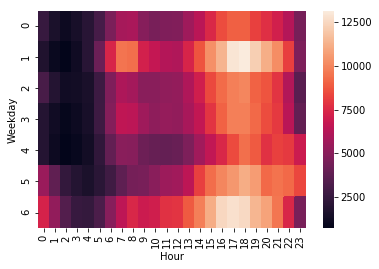

In [21]:
seaborn.heatmap(by_h_d)

In [22]:
# analysis with longitude and langitude

''

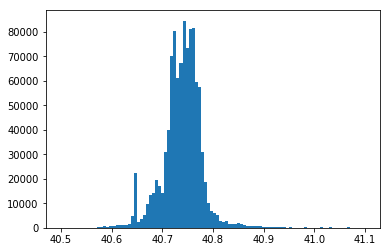

In [23]:
hist(data['Lat'],bins=100,range=(40.5,41.1))
;

''

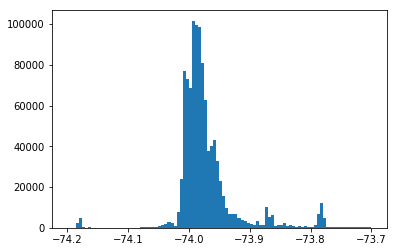

In [24]:
hist(data['Lon'],bins=100,range=(-74.2,-73.7))
;

''

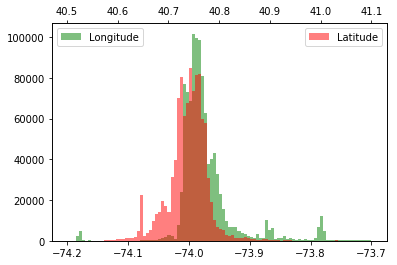

In [25]:
hist(data['Lon'],bins=100,range=(-74.2,-73.7),color='g',alpha=.5,label='Longitude')
legend(loc='upper left')
twiny()
hist(data['Lat'],bins=100,range=(40.5,41.1),color='r',alpha=.5,label='Latitude')
legend(loc='upper right')
;

(40.5, 41.1)

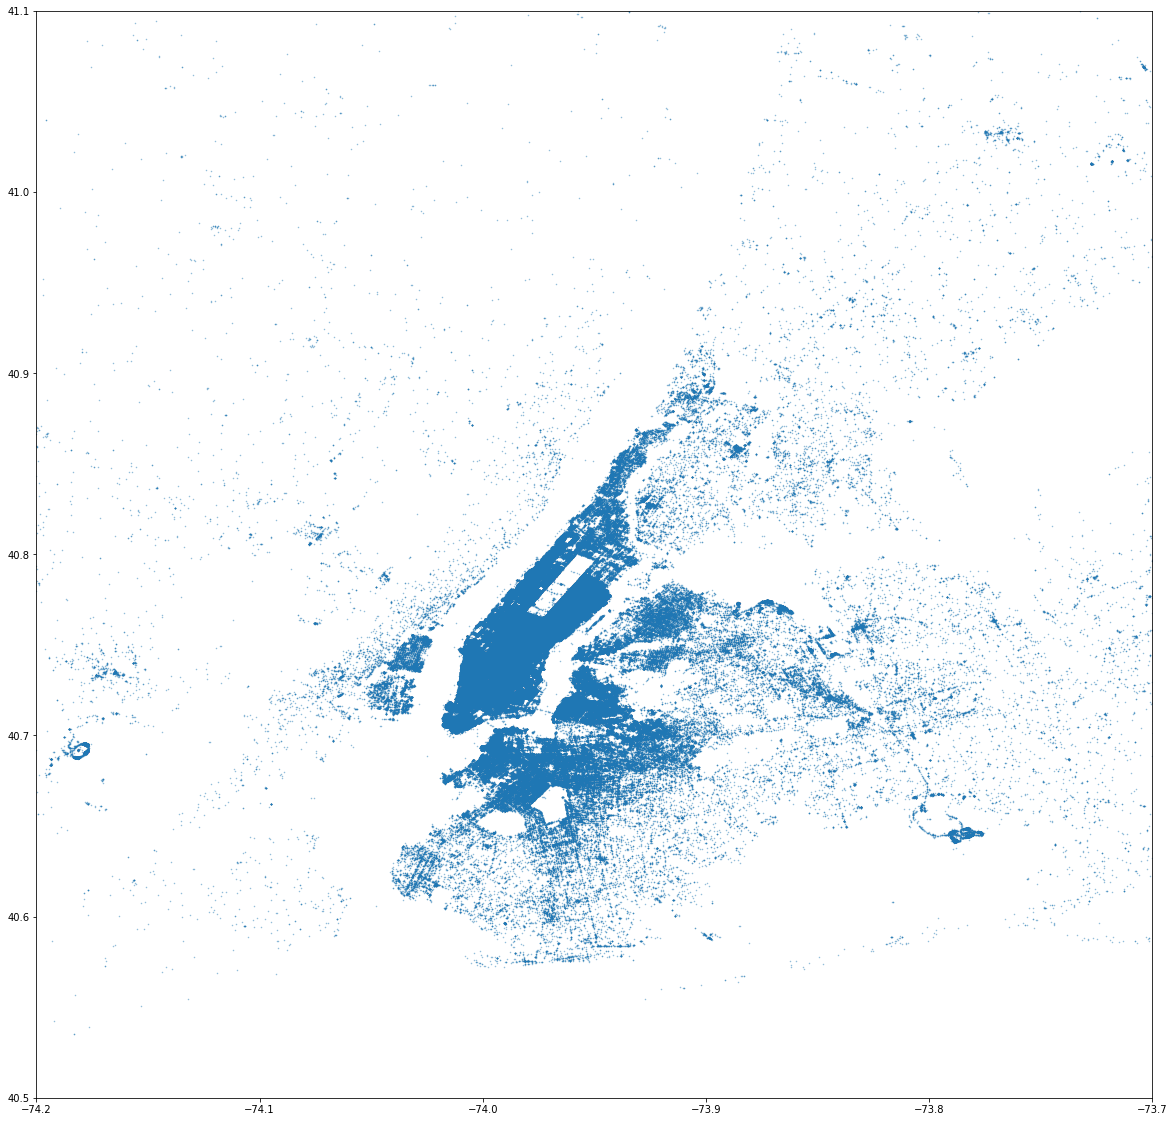

In [26]:
figure(figsize=(20,20))
plot(data['Lon'],data['Lat'],'.',ms=1,alpha=.5)
xlim(-74.2,-73.7)
ylim(40.5,41.1)

In [27]:
len(data)

1028136